<a href="https://colab.research.google.com/github/o-b-one/pose-estimator/blob/master/PCA_to_pose_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/o-b-one/pose-estimator/master/trainer/dataset/pose.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,leftArmpitAngle,rightArmpitAngle,leftShoulderAngle,rightShoulderAngle,leftElbowAngle,rightElbowAngle,leftHipAngle,rightHipAngle,leftGroinAngle,rightGroinAngle,leftKneeAngle,rightKneeAngle,slope,verticalPose,ratioAvg,action
0,12.72,22.83,12.72,22.83,153.05,11.32,89.46,102.46,89.46,102.46,174.11,145.50,2.471433,1000,1.064219,squat
1,22.91,15.25,22.91,15.25,162.63,0.67,82.01,107.70,82.01,107.70,174.83,176.91,3.668098,1000,1.264706,squat
2,17.14,12.68,17.14,12.68,173.05,19.03,76.20,116.04,76.20,116.04,179.54,175.10,3.776714,1000,1.340035,squat
3,18.40,3.64,18.40,3.64,171.86,23.88,100.09,92.20,100.09,92.20,168.93,173.31,3.673570,1000,1.150195,squat
4,21.68,4.56,21.68,4.56,165.21,161.69,94.76,98.14,94.76,98.14,168.46,171.12,3.602890,1000,1.161230,squat


In [ ]:
df.shape

(463, 16)

In [ ]:
df_for_pca = df.drop(["verticalPose", "ratioAvg",	"action"], axis=1)
action = list(df["action"])

In [ ]:
df_for_pca.head()

,leftArmpitAngle,rightArmpitAngle,leftShoulderAngle,rightShoulderAngle,leftElbowAngle,rightElbowAngle,leftHipAngle,rightHipAngle,leftGroinAngle,rightGroinAngle,leftKneeAngle,rightKneeAngle,slope
0,12.72,22.83,12.72,22.83,153.05,11.32,89.46,102.46,89.46,102.46,174.11,145.50,2.471433
1,22.91,15.25,22.91,15.25,162.63,0.67,82.01,107.70,82.01,107.70,174.83,176.91,3.668098
2,17.14,12.68,17.14,12.68,173.05,19.03,76.20,116.04,76.20,116.04,179.54,175.10,3.776714
3,18.40,3.64,18.40,3.64,171.86,23.88,100.09,92.20,100.09,92.20,168.93,173.31,3.673570
4,21.68,4.56,21.68,4.56,165.21,161.69,94.76,98.14,94.76,98.14,168.46,171.12,3.602890


In [ ]:
# are there duplicated rows?

# sum(list(df_for_pca.duplicated()))
dup = df_for_pca.duplicated()

dup.where(lambda x: x == True).dropna()


38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
50    1.0
51    1.0
52    1.0
53    1.0
54    1.0
55    1.0
56    1.0
57    1.0
58    1.0
59    1.0
60    1.0
61    1.0
62    1.0
63    1.0
64    1.0
65    1.0
66    1.0
67    1.0
68    1.0
69    1.0
70    1.0
71    1.0
72    1.0
73    1.0
74    1.0
75    1.0
dtype: float64

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_for_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['action']]], axis = 1)

In [ ]:
finalDf.head()  

,principal component 1,principal component 2,action
0,-100.169873,62.842851,squat
1,-99.775190,62.816744,squat
2,-94.983873,84.436024,squat
3,-98.210575,86.792090,squat
4,-36.246644,148.057059,squat


In [ ]:
df['action'].unique()

array(['squat', 'stand', 'pushdown', 'pushup', 'pulljerk', 'pushjerk'],
      dtype=object)

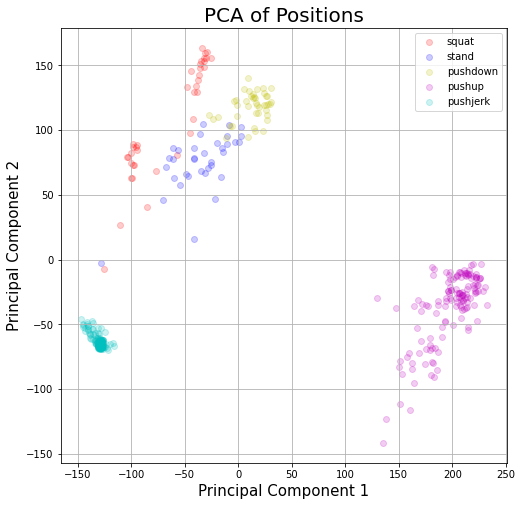

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of Positions', fontsize = 20)
targets = ['squat', 'stand', 'pushdown', 'pushup',  'pushjerk', 'pulljerk']
colors = ['r','g', 'b', 'y', 'm', 'c']
for target, color in zip(targets,colors):
    if target == 'stand': continue
    indicesToKeep = finalDf['action'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.2)
ax.legend(targets)
ax.grid()